[Matplotlib](https://matplotlib.org/) is highly customizable, and having a huge code base means it might not be easy to find what I need quickly. 

A recurring problem that I often face is customizing figure legend. Although Matplotlib website provides excellent [document](https://matplotlib.org/users/legend_guide.html), I decided to write down some tricks that I found useful on the topic of handling figure legends. 

First, as always, load in useful libraries and enable [matplotlib magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib).

In [77]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from itertools import izip
import pandas as pd
import numpy as np


The first thing I found useful is to create a figure legend out of nowhere. 

In this example, I synthesized poll data with 'yes' or 'no' as the answer, and try to plot color-coded bar graph from these two data points.

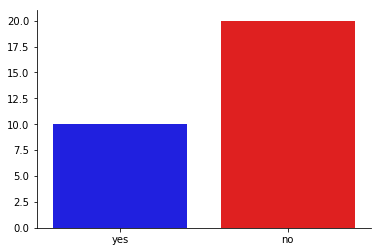

In [54]:
ax = plt.subplot(111)
answers = ['yes','no']
votes = [10,20]
sns.barplot(x=answers, y = votes, palette=colors, ax=ax)
sns.despine()

From the above plot, legend cannot be plotted using ```ax.legend()```, since they were not labelled. In this case, I need to use ``patches`` from ``matplotlib`` to make the legend handles, and add to the figure by ```ax.legend()``` 

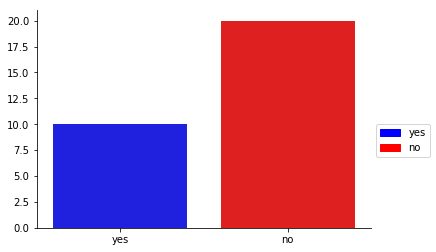

In [57]:
ax = plt.subplot(111)
answers = ['yes','no']
votes = [10,20]
sns.barplot(x=answers, y = votes, palette=colors, ax=ax)
sns.despine()
colors = ['blue','red']
pat = [mpatches.Patch(color=col, label=lab) for col, lab in zip(colors, answers)]
ax.legend(handles=pat, bbox_to_anchor = (1,0.5))

Another frequently-encountered problem is the duplicate legend labels.

To illustrate this problem, I will simulate a data of movement of 10 particles of two types bwtween two time points in a 2D space (x1, y1 are the initial coordinates; x2, y2 are the new coordinates; the column 'label'
indicates the particle types). I am also writing a color encoder function for assigning distintive color to each particle type.

In [95]:
def color_encoder(xs, colors=sns.color_palette('Dark2',8)):
    '''
    color encoding a categoric vector
    '''
    xs = pd.Series(xs)
    encoder = {x:col for x, col in izip(xs.unique(), colors)}
    return xs.map(encoder)

sim = pd.DataFrame(np.random.rand(10,4), columns = ['x1','x2', 'y1','y2']) \
    .assign(label = lambda d: np.random.binomial(1, 0.5, 10)) \
    .assign(color = lambda d: color_encoder(d.label))
sim.head()

,x1,x2,y1,y2,label,color
0,0.902625,0.755530,0.211558,0.512878,1,"(0.105882352941, 0.619607843137, 0.466666666667)"
1,0.327010,0.275663,0.876240,0.821259,1,"(0.105882352941, 0.619607843137, 0.466666666667)"
2,0.193913,0.934108,0.746931,0.826095,1,"(0.105882352941, 0.619607843137, 0.466666666667)"
3,0.190888,0.263192,0.331592,0.081737,0,"(0.850980392157, 0.372549019608, 0.0078431372549)"
4,0.884696,0.221513,0.346046,0.071234,0,"(0.850980392157, 0.372549019608, 0.0078431372549)"


To plot the movement, I iterate over the [pandas](https://pandas.pydata.org/) ``DataFrame`` object and plotted a line between the initial and the new coodinate for each particle at a time.

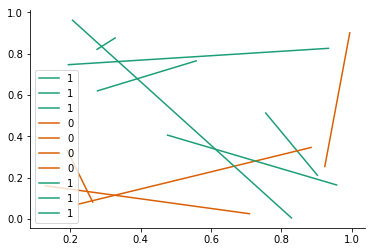

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
for index , row in sim.iterrows():
    ax.plot([row['x1'], row['x2']], [row['y1'],row['y2']], 
               label = row['label'], 
               color = row['color'])
ax.legend()
sns.despine()

And the default legend is producing a handler for each line. To simplify the legend, I found a elegant solution of [stackoverflow](https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend), that used ``dict`` object in python to remove redundant legend labels. 

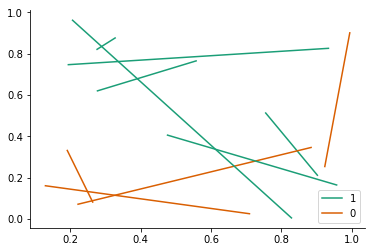

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
for index , row in sim.iterrows():
    ax.plot([row['x1'], row['x2']], [row['y1'],row['y2']], 
               label = row['label'], 
               color = row['color'])
ax.legend()
handles, labels = ax.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
plt.legend(lgd.values(), lgd.keys())
sns.despine()